# 🍏⏩🍎 🌐 **SFPPyLite** DEMO 🚧 **Running Entirely in Your Browser** 🌟

> This interactive demo runs **fully locally** in your browser using [JupyterLite](https://jupyterlite.readthedocs.io/).  
> **No installation**, **no server**, and **no internet** access are required after loading.<br>
> Explore the features of 🌐**SFPPy** in a lightweight, zero-dependency environment. <br><br>
> ⭒˗ˏˋ𓆩 ⚠ 𓆪ˎˊ˗⭒ **Please Note the Caveats**<br>
> ❗ Execution is typically *2 to 4 times* slower than native Python on the same machine. <br>
> ‼️ Import time can be *10 to 20 times* slower, especially for complex modules.

---

📌 🌐 **SFPPyLite** is a **tuned and lightweight version** of the full SFPPy distribution. It has been slightly modified at the source level to meet the constraints of [Pyodide](https://pyodide.org/en/stable/) — a browser-based WebAssembly port of CPython.  

The current 🌐 **SFPPyLite** release includes all substances listed in 🇪🇺 [Annex I](https://echa.europa.eu/plastic-material-food-contact) of Regulation (EU) 10/2011.  
🚫 **Note:** No toxicological assessment is provided, as ToxTree is not compatible with browser-based execution.


## 0 👇 | Minimal Configurator of 🌐**SFPPyLite** ⏳
⏱️ *First execution may take 5–20 seconds*<br>
> You should see the banner **"SFPPyLite DEMO"** if everything is working correctly.<br>
> After this step, **no internet connection is needed**.


In [1]:
import micropip
await micropip.install("numpy")
await micropip.install("scipy")
await micropip.install("matplotlib")
await micropip.install("pandas")
await micropip.install("ipywidgets")
await micropip.install("nbformat")
await micropip.install("openpyxl")
import sys, os, time
from IPython.display import display, HTML
"/drive" in sys.path or sys.path.append("/drive")   # Add the correct path for SFPPylite
from utils.nbutils import create_header_footer, set_figure_format
(header,footer,separator) = create_header_footer(title="🌐SFPPyLite - DEMO 🚧 Notebook 📑",what="all"); display(header, separator)
separator2 = HTML('<hr style="border: none; height: 4px; width: 60%; margin: 2em auto; background-color: #4CAF50; border-radius: 2px;">')

## 1 📋 | **Simple Numeric Example**

> We begin with a minimal numerical test case to validate the solver, using less code to compile.<br>
> The estimated **compilation and execution time** is indicated by hourglasses: ⏳ ≈ 1 min.<br>
> An empty hourglass ⌛ means near-instant execution (typically under 10 seconds).


### 1.1 ⚙️ | ⏳⏳⏳⏳⏳ **Compiling Dependencies**

⏱️ *Initial compilation may take up to 3–5 minutes*<br>
> Creating bytecode from Python sources directly in your browser takes time — feel free to grab a ☕🍪🥐 while you wait.<br>
> If you encounter any issues, go to the MENU ☰ and select **Kernel → Restart Kernel**.


In [2]:
start = time.time()
from patankar.food import ethanol  # food database
from patankar.layer import layer  # material database
print(f"Import/compilation completed in {time.time() - start:.2f} seconds")

Import/compilation completed in 22.88 seconds


### 1.2 📐 | ⌛**Mass Transfer Problem from [Snippet 1](https://github.com/ovitrac/SFPPy)**
⏱️ *Execution time < 1 s* <br>
> At the first execution, you will read (it is ok): `Matplotlib is building the font cache; this may take a moment.` <br>
> The structure of the multilayer is shown at the end.

In [3]:
# Define the food contact medium and layers
simulant = ethanol() # here a food simulant
A = layer(layername="layer 1 (contact)", D=1e-15, l=50e-6, C0=0, k=1)  # SI units
B = layer(layername="layer 2", D=(1e-9, "cm**2/s"), l=(100, "um"),k=2)
multilayer = A + B  # layer A is contact (food is on the left)
multilayer

Matplotlib is building the font cache; this may take a moment.



[LAYER object version=1, contact=olivier.vitrac@agroparistech.fr]
2-multilayer of LAYER object:
-- [ layer 1 of 2 ] ---------- barrier rank=1 --------------
      name: "layer 1 (contact)"
      type: "unknown type"
  material: "unknown material"
      code: "N/A"
         l: 5e-05 [m]
         D: 1e-15 [m**2/s]
         k: 1 [a.u.]
        C0: 0 [a.u.]
-- [ layer 2 of 2 ] ---------- barrier rank=2 --------------
      name: "layer 2"
      type: "unknown type"
  material: "unknown material"
      code: "N/A"
         l: 0.0001 [m]
         D: 1e-13 [m**2/s]
         k: 2 [a.u.]
        C0: 1000 [a.u.]


<layer with 2 layers: ['layer 1 (contact)', 'layer 2']>

### 1.3  🧮 | ⌛ **Migration Simulation**
> ⏱️ *Execution time 1-5 s* <br>
> It depends on the simulated problem and on the power of your PC.

In [4]:
solution = simulant.migration(multilayer)

### 1.4 📈 | ⌛ Plots
⏱️ *Execution time <2s*
> For better quality, we recommend "svg".<br>
> Use "retina" on HiDPI screens<br>
> Use "png" if you experience issues

📊 Matplotlib inline figure format set to: svg


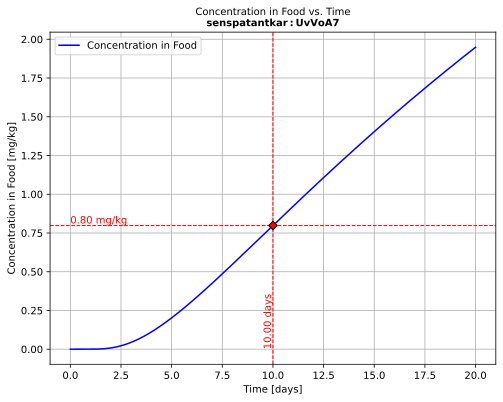

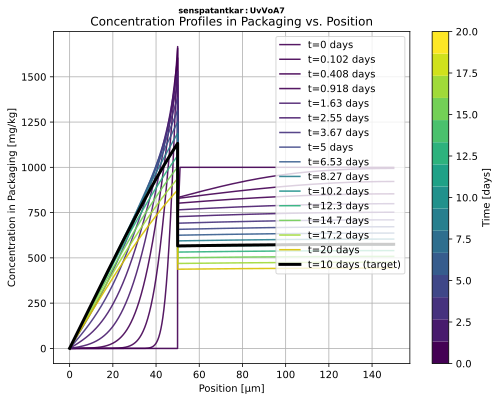

In [20]:
from patankar.useroverride import useroverride # user override for controlling plots and numerical tolerances
useroverride.plotconfig["Cunit"] = "mg/kg" # to fix concentration units instead of a.u.
set_figure_format("svg") # for better quality in your browser (use "png" for low quality, "retina" for HIRES png)
hCF = solution.plotCF()  # concentration kinetic in the simulant (F) for default times
hCx = solution.plotCx()  # concentration profiles

### 1.5 🖼️ | ⌛ **Export Figures as PNG and PDF from Your Browser**

⏱️ Execution time: < 2 seconds<br>
> The generated files are saved at the root of the virtual drive (📂 `/drive/`).<br>
> You can download these 📄 directly from the file browser in the left sidebar of JupyterLite.


In [21]:
from patankar.migration import print_figure
print_figure(hCF, destinationfolder="/drive/",overwrite=True) # hCF is saved in both PDF and PNG
print_figure(hCx, destinationfolder="/drive/", overwrite=True) # idem for hCx

Saved PDF: /drive/pltCF_senspatantkar:UvVoA7.pdf
Saved PNG: /drive/pltCF_senspatantkar:UvVoA7.png
Saved PDF: /drive/pltCx_senspatantkar:UvVoA7.pdf
Saved PNG: /drive/pltCx_senspatantkar:UvVoA7.png


### 1.6 📊 | ⌛ **Export Data to Excel and CSV from your Browser**
⏱️ Execution time <2s<br>
> The files are located at the root (📂/drive/) of the virtual drive.

In [22]:
solution.comparison.save_as_csv("myresult.csv", overwrite=True) # CSV format
solution.comparison.save_as_excel("myresult.xlsx", overwrite=True) # Excel format
display(separator)

Saved CSV file: /drive/myresult.csv
Saved Excel file: /drive/myresult.xlsx


## 2 ⚗️ | **Adding Chemical Information**

> Chemical information must be provided for the **substance**, the **simulant/food**, and the **polymer**.<br>
> This information is used to estimate partition coefficients $\frac{k}{k_0}$ and diffusion coefficients $D$, where the subscript $0$ refers to the food or simulant layer.


### 2.1 ⌬ | ⌛ Import Chemical Databases, Models, and Search Engine

⏱️ Execution time: < 2 seconds<br>
> If the SFPPy modules have already been imported, this step is instantaneous.


In [23]:
from patankar.loadpubchem import migrant

### 2.2 ⌬ | ⌛ **Test the Databases**

⏱️ Execution time: < 5 seconds<br>
> ❗ Please focus on substances already present in the database.  
> Automatic retrieval from PubChem may lead to occasional errors.<br>
> Below is the information for a large antioxidant, **Irganox 1790**, which is authorized for food contact in the 🇪🇺.


In [24]:
m0 = migrant("Irganox 1790") # test with BHT, anisole, limonene, Irganox 1076, Irgafos 168, DEHP....
m0

<migrant object>
         Compound: Irganox 1790
             Name: 1,3,5-tris(4-tert-bu [...] 4,6(1H,3H,5H)-trione
              cid: 93221
              CAS: 40601-76-1
          M (min): 699.9
          M_array: [699.9]
          formula: C42H57N3O6
           smiles: CC1=CC(=C(C(=C1CN2C( [...] C)C)O)C)C)O)C(C)(C)C
         InChiKey: XYXJKPCGSGVSBO-UHFFFAOYSA-N
             logP: [10.]
        P' (calc): [0.]
   --- EC 10/2011: ---------------
              SML: 6 [mg/kg]
       EC|FCM|REF: 254-996-9|689|95280


<migrant: 1,3,5-tr [...] yanurate - M=699.9 g/mol>

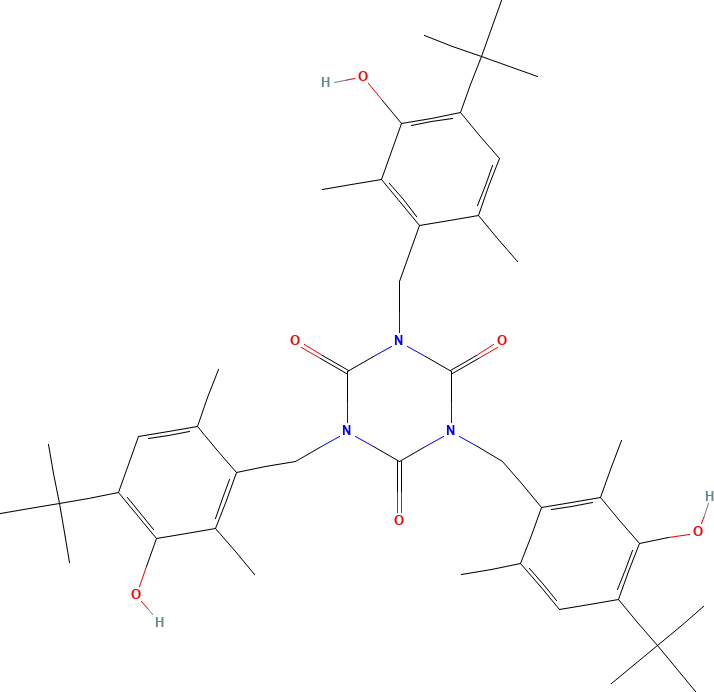

In [25]:
m0.image # gets its image

**We add more substances:**

In [26]:
[print(migrant(m)) for m in ["toluene", "anisole", "limonene", "BHT", "DEHP", "Irganox 1076", "Irgafos 168"]]
display(separator)

⚠️Warning: No 🇪🇺10/2011/EC record found for PubChem cid 1140.
<migrant: RAMIPRIL [...] MPURITY) - M=92.14 g/mol>
<migrant: SCHEMBL497674 - M=108.14 g/mol>
<migrant: Nesol - M=136.23 g/mol>
<migrant: E-321 - M=220.35 g/mol>
<migrant: Reomol dop - M=390.6 g/mol>
<migrant: EINECS 218-216-0 - M=530.9 g/mol>
<migrant: tris(2,4 [...] hosphite - M=646.9 g/mol>


## 3 🧩 | ⌛ **Complex Migration Modeling 🍽️ Informed by Chemistry**

This example is adapted from [Snippet 4](https://github.com/ovitrac/SFPPy)  
It demonstrates that the most advanced features of **SFPPy** are fully functional in 🌐 **SFPPyLite**.

---

### 3.1 ⌬ | ⌛ **Define Chemicals and Materials**

⚠️ To properly inform the model with chemical context, you must explicitly define the **substance**, the **material**, and the **simulant or food**.  
You cannot rely solely on base classes like `layer` or `foodlayer`.

📚 For detailed guidance, refer to the [SFPPy Wiki pages](https://ovitrac.github.io/SFPPy/wikipages/) and explore the examples provided in the notebooks.


In [27]:
from patankar.layer import wPET, PP
from patankar.food import ambient, hotfilled, realfood, fat, liquid, stacked
m = migrant("limonene") # it is a toy substance (aroma), choose yours
A = wPET(l=(20, "um"), migrant=m, C0=0)
B = PP(l=(500, "um"), migrant=m, C0=200)  
ABA = A + B + A  # the most left layer is contact (food on the left)
print(repr(ABA)) # show the trilayer material ABA
display(separator2)


[LAYER object version=1, contact=olivier.vitrac@agroparistech.fr]
3-multilayer of LAYER object:
-- [ layer 1 of 3 ] ---------- barrier rank=2 --------------
      name: "layer in wPET"
      type: "polymer"
  material: "plasticized PET"
      code: "PET"
   crystal: 0.35
        Tg: 46 [degC]
         l: 2e-05 [meter]
         D: 5.241e-16 [m**2/s]
          = Dpiringer(wPET,<migrant: Nesol - M=136.23 g/mol>,T=40.0 degC)
         k: 0.8452 [a.u.]
          = kFHP(<ethylene terephthalate>,<migrant: Nesol - M=136.23 g/mol>)
        C0: 0 [a.u.]
         T: 40 [degC]
-- [ layer 2 of 3 ] ---------- barrier rank=3 --------------
      name: "layer in PP"
      type: "polymer"
  material: "isotactic polypropylene"
      code: "PP"
   crystal: 0.5
        Tg: 0 [degC]
         l: 0.0005 [meter]
         D: 4.258e-13 [m**2/s]
          = Dpiringer(PP,<migrant: Nesol - M=136.23 g/mol>,T=40.0 degC)
         k: 4.322 [a.u.]
          = kFHP(<propylene>,<migrant: Nesol - M=136.23 g/mol>)
        

### 3.2 🔗 | ⌛ **Definition of 3 Chained Contact Conditions**

This section defines three **linked contact scenarios** commonly encountered in food packaging chains.  
Each stage is modeled as a class, specifying physical, chemical, and regulatory conditions relevant to the simulation.

> 📦☰ ➜ 🔥🥫 ➜ 🗓️🖥  
> This emoji chain represents the progression from **stacked storage** ➜ **hot-filling** ➜ **long-term food storage with simulation**.

---

#### 📦 <kbd>STEP 1</kbd>: Set-off During Storage in Stacks  
Represents contact between materials stacked during storage or transport.  
- **Conditions:** ambient temperature, indirect contact (no food)  
- **Duration:** 4 months  
```python
class contact1(stacked, ambient): 
    name = "📦 1: setoff"
    contacttime = (4, "months")
```

---

#### 🔥🥫 <kbd>Step 2</kbd>: Hot-Filling of Liquid/Fatty Foods  
Models the hot-filling of real, often fatty or liquid foods into packaging materials.  
- **Conditions:** elevated temperature, direct contact, real food  
```python
class contact2(hotfilled, realfood, liquid, fat): 
    name = "🔥🥫 2: hotfilling"
```

---

#### 🗓️🖥 <kbd>Step 3</kbd>: Long-Term Storage of Packaged Food  
Simulates prolonged storage of packaged food at ambient conditions, with a digital model.  
- **Conditions:** ambient temperature, real food, fatty and liquid simulant  
- **Duration:** 6 months  
```python
class contact3(ambient, realfood, liquid, fat): 
    name = "🗓️🖥 3: storage"
    contacttime = (6, "months")
```

---

These are instantiated as:

```python
medium1, medium2, medium3 = contact1(), contact2(), contact3()
```

In [28]:
# 1:storage in stacks >> 2:hot-filled container >> 3:long-term storage of packaged food
class contact1(stacked, ambient): name = "1:setoff"; contacttime = (4, "months")
class contact2(hotfilled, realfood, liquid, fat): name = "2:hotfilling"
class contact3(ambient, realfood, liquid, fat): name = "3:storage"; contacttime = (6, "months")
medium1, medium2, medium3 = contact1(), contact2(), contact3()
display(separator2)


### 3.3 🧠 | ⌛ **Full Simulation with Automatically Chained Contact Conditions**
> This step runs the **full simulation**, chaining the defined contact scenarios automatically.  
> The model simulates migration from a multilayer material (**ABA**) into a sequence of media:

📦☰ ➜ 🔥🥫 ➜ 🗓️🖥

```python
m % medium1 >> ABA >> medium1 >> medium2 >> medium3
```

In [29]:
m % medium1 >> ABA >> medium1 >> medium2 >> medium3  # Automatic chaining

SensPatankarResult: senspatantkar:UvVoA7
	 <no description>
	 - with 1000 time steps
 	 - with 1803 spatial points
	 - Time range: [0.00e+00, 3.16e+07] s
	 - Position range: [0.00e+00, 5.40e-04] m


<SensPatankarResult:senspatantkar:UvVoA7: CF(182.6 [days]) = 2.368 [a.u.]>

In [30]:
display(separator2)

### 3.4 📈 | ⌛ Merge and Plot Global Migration Kinetics
> After simulating each contact phase, we **merge the resulting kinetics** into a single object and plot the **global migration profile**.  
> This step combines all results into a unified time series, aligned across step transitions:

```python
sol123 = medium1.lastsimulation + medium2.lastsimulation + medium3.lastsimulation
```

In [31]:
# Merge all kinetics into a single one and plot the migration kinetics
sol123 = medium1.lastsimulation + medium2.lastsimulation + medium3.lastsimulation
display(separator2)

### 3.5 🖼️💾 | ⌛ Plot, Export, and Save Final Results

> In this final step, we **plot the cumulative migration profile** and **export the results** in both image and spreadsheet formats.  
> The figure is saved to the virtual drive and data are made available as `.csv` and `.xlsx` files.

```python
hCF123 = sol123.plotCF(subtitle="ABA with 3 steps");  # Add semicolon to prevent double display

print_figure(hCF123, destinationfolder="/drive/", overwrite=True)

sol123.comparison.save_as_csv("ABA3steps.csv", overwrite=True)     # Export to CSV
sol123.comparison.save_as_excel("ABA3steps.xlsx", overwrite=True)  # Export to Excel

display(separator, footer)  # Visual end of section
```

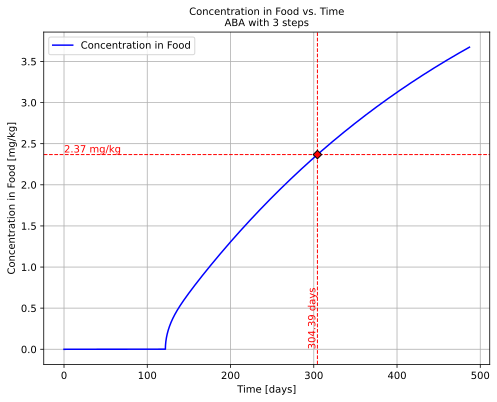

Saved PDF: /drive/pltCF_senspatantkar:UvVoA7.pdf
Saved PNG: /drive/pltCF_senspatantkar:UvVoA7.png
Saved CSV file: /drive/ABA3steps.csv
Saved Excel file: /drive/ABA3steps.xlsx


In [32]:
hCF123 = sol123.plotCF(subtitle="ABA with 3 steps"); # add a ; not to have the figure plotted twice
print_figure(hCF123, destinationfolder="/drive/",overwrite=True)
sol123.comparison.save_as_csv("ABA3steps.csv", overwrite=True) # CSV format
sol123.comparison.save_as_excel("ABA3steps.xlsx", overwrite=True) # Excel format
display(separator)

## 4 🧰📊 | ⌛ Test Widgets for Interactive Visualization

The previous results can be explored interactively using **SFPPyLite’s browser-native widgets**.  
This section integrates all individual contact steps as well as the merged result into a single interactive tool.

> These widgets run **fully in the browser**, with no server or Python backend required — a powerful capability for embedded analysis, teaching, or sharing.

### 🧪 Steps integrated:
- `step1` = 📦 storage in stacks
- `step2` = 🔥🥫 hot-filling
- `step3` = 🗓️🖥 long-term storage
- `all`   = full merged migration profile

```python
from patankar.migration import create_plotmigration_widget  # migration widgets

mig_widget = create_plotmigration_widget()

mymigration["step1"] = medium1.lastsimulation
mymigration["step2"] = medium2.lastsimulation
mymigration["step3"] = medium3.lastsimulation
mymigration["all"]   = sol123

display(mig_widget, separator, footer)


In [33]:
from patankar.migration import create_plotmigration_widget  # migration widgets
mig_widget = create_plotmigration_widget();
mymigration["step1"] = medium1.lastsimulation
mymigration["step2"] = medium2.lastsimulation
mymigration["step3"] = medium3.lastsimulation
mymigration["all"] = sol123
display(mig_widget, separator, footer)